## Exploratory Data Analysis (EDA) on Big Mart Sales

**Report Contents**

1. Data description
2. Initial plan for EDA
3. Data cleaning, EDA and insights
4. Feature engineering
5. Hypotheses and testing
6. Suggestions and Conclusion

### 1. Data description

First, the libraries are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pandasql as ps
%matplotlib inline

[_Data_](https://www.kaggle.com/akashdeepkuila/big-mart-sales) is read. Here is the story:

The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. It is aimed to understand the properties of products and outlets which play a key role in increasing sales.

In [2]:
data = pd.read_csv("data/big_mart_train_data.csv")
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.dtypes  # data columns (features) and data types

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

Column descriptions are shared as follows:

1. ProductID : unique product ID
2. Weight : weight of the product
3. FatContent : specifies whether the product is low on fat or not
4. Visibility : percentage of total display area of all products in a store allocated to the particular product
5. ProductType : the category to which the product belongs
6. MRP : Maximum Retail Price (listed price) of the product
7. OutletID : unique store ID
8. EstablishmentYear : year of establishment of the outlet/store
9. OutletSize : the size of the store in terms of ground area covered
10. LocationType : the type of city in which the store is located
11. OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket
12. OutletSales : sales of the product in the particular store

Further information on the data set:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 2. Initial plan for EDA
According to this summary, null cells exist in the data. Basic data cleaning might be needed.
There are also several categorical variables to explore.

There are two main "segments" in the data: the products and the stores.
The corresponding features of these are also planned to be studied within these categories separately, and also simultaneously.
It is always a good idea to remember the goal of this analysis: understand
and identify the properties of the products and the stores in order to
analyze the sales.

### 3. Data cleaning and EDA
#### 3.1 Data cleaning

The missing data must be handled first.

In [5]:
data.isnull().sum()  # total missing cells per column

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [6]:
data.isnull().mean()  # the percentage missing

ProductID            0.000000
Weight               0.171653
FatContent           0.000000
ProductVisibility    0.000000
ProductType          0.000000
MRP                  0.000000
OutletID             0.000000
EstablishmentYear    0.000000
OutletSize           0.282764
LocationType         0.000000
OutletType           0.000000
OutletSales          0.000000
dtype: float64

There is two variables that have missing information: Weight and outlet size.
A couple of assumptions can be made for data cleaning: let's examine these variables first.
The column "weight" is numerical and almost 20% of this column is missing. However, this percentage may not be representing the reality, since
data may have product duplicates, since the products can be sold in various stores. From now on, data that is product-specific
will be separately examined to be able to analyze data accurately.

In [7]:
len(data['ProductID'].unique())  # the number of unique products in the data

1559

In [8]:
products_df = data.loc[:, ['ProductID', 'Weight',
                           'FatContent', 'ProductType']]
# product specific columns, assumed to have the same value for a unique product

ps.sqldf("select * "
         "from (select distinct * from products_df)"
         "order by ProductID asc").head(10)

,ProductID,Weight,FatContent,ProductType
0,DRA12,11.600,Low Fat,Soft Drinks
1,DRA12,11.600,LF,Soft Drinks
2,DRA24,19.350,Regular,Soft Drinks
3,DRA24,NaN,Regular,Soft Drinks
4,DRA59,8.270,Regular,Soft Drinks
5,DRA59,NaN,Regular,Soft Drinks
6,DRB01,7.390,Low Fat,Soft Drinks
7,DRB01,NaN,Low Fat,Soft Drinks
8,DRB13,6.115,Regular,Soft Drinks
9,DRB24,8.785,Low Fat,Soft Drinks


As it can be seen from this sample, some products in the original data may not have a non-null weight variable.
However, the rows for the same product may have that information. That means, the missing values for the
weight variable will be found from the other rows and replaced.

In [9]:
id_weight = ps.sqldf("select distinct ProductID, Weight "
                     "from (select distinct * from products_df)"
                     "where Weight is not null")
id_weight.head()

,ProductID,Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
4,NCD19,8.93


Let's find out if all of the missing weight values in the original data can be recovered with this fashion or not.

In [10]:
for index, row in data.iterrows():
    if pd.isnull(row['Weight']):
        for index2, row2 in id_weight.iterrows():
            if row['ProductID'] == row2['ProductID']:
                data.at[index, 'Weight'] = id_weight.at[index2, 'Weight']
                break
data.isnull().sum()

ProductID               0
Weight                  4
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Since there are now only 4 rows missing weight, they can be dropped from the data.

In [11]:
data.dropna(subset=['Weight'], inplace=True)
data.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Now, as the summary illustrates, there are missing values in the column "Outlet Size".
Data type of this column is "object", which means this variable is a categorical variable.
Almost 30% of this column is missing. Let's see if it is possible to follow the same approach
for the recovery of the weight values.

In [12]:
len(data['OutletID'].unique())  # the number of unique stores in the data

10

In [13]:
store_df = data.loc[:, ['OutletID', 'EstablishmentYear',
                        'OutletSize', 'LocationType', 'OutletType']]
# store specific columns, assumed to have the same value for a unique store
store = ps.sqldf("select * "
                 "from (select distinct * from store_df)"
                 "order by OutletID asc")
store.head(10)

,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,OUT010,1998,None,Tier 3,Grocery Store
1,OUT013,1987,High,Tier 3,Supermarket Type1
2,OUT017,2007,None,Tier 2,Supermarket Type1
3,OUT018,2009,Medium,Tier 3,Supermarket Type2
4,OUT019,1985,Small,Tier 1,Grocery Store
5,OUT027,1985,Medium,Tier 3,Supermarket Type3
6,OUT035,2004,Small,Tier 2,Supermarket Type1
7,OUT045,2002,None,Tier 2,Supermarket Type1
8,OUT046,1997,Small,Tier 1,Supermarket Type1
9,OUT049,1999,Medium,Tier 1,Supermarket Type1


Unfortunately, all the rows in this query seems to be unique already, which means
the size of some specific stores cannot be recovered from the data itself.
Since there is a limited number of stores, the most common store size can be
used for the missing values.

<AxesSubplot:>

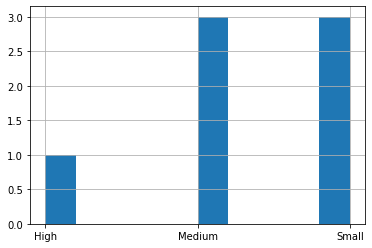

In [14]:
store['OutletSize'].hist()

Let's consider "Medium" as the common outlet size and replace the null values.

In [15]:
for index, row in data.iterrows():
    if pd.isnull(row['OutletSize']):
        data.at[index, 'OutletSize'] = "Medium"
data['OutletSize'].isnull().sum()

0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8519 non-null   object 
 1   Weight             8519 non-null   float64
 2   FatContent         8519 non-null   object 
 3   ProductVisibility  8519 non-null   float64
 4   ProductType        8519 non-null   object 
 5   MRP                8519 non-null   float64
 6   OutletID           8519 non-null   object 
 7   EstablishmentYear  8519 non-null   int64  
 8   OutletSize         8519 non-null   object 
 9   LocationType       8519 non-null   object 
 10  OutletType         8519 non-null   object 
 11  OutletSales        8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


Now, let's look at the numerical columns.

In [17]:
data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


According to this table, there are zero-values in the product visibility column,
which means there can be missing visibility information for some of the
product sales. Let's count them.

In [18]:
(data['ProductVisibility'] == 0).sum()

526

This is a serious amount of information. Let's plot a histogram.

[Text(0.5, 0, 'Product Visibility'), Text(0, 0.5, 'Frequency')]

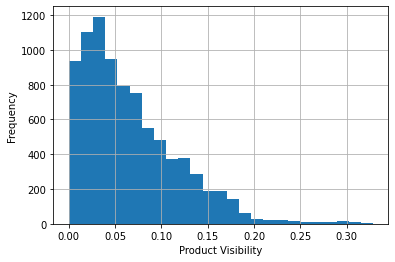

In [19]:
ax = plt.axes()
ax = data['ProductVisibility'].hist(bins=25)
ax.set(xlabel='Product Visibility', ylabel='Frequency')

Now, let's look at the scatter plot of the variables visibility and total sales.

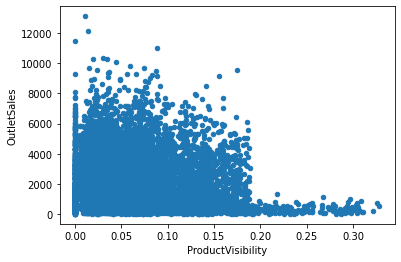

In [20]:
#scatter plot ProductVisibility/OutletSales
var = 'ProductVisibility'
splot = pd.concat([data['OutletSales'], data[var]], axis=1)
splot.plot.scatter(x=var, y='OutletSales');

It is clear that data shows plenty of sales within a wide range has been made when the visibility is zero.
If a product is being sold in a particular store, then the product
is expected to have non-zero visibility.
That is why these zero values can be misleading, so it might be better to get rid of these rows.

In [21]:
data = data[data['ProductVisibility'] != 0.0]
data['ProductVisibility'].min()

0.003574698

Now, the data can be considered to be complete. Let's now explore the data.
#### 3.2 EDA

Since the "star" feature here to be analyzed is the sales, which of the features
of the data are important to consider?

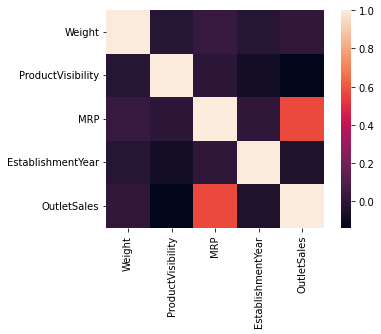

In [22]:
eda_data = data.copy()
#correlation matrix
corrmat = eda_data.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True);


MRP (maximum retail price) seems to be correlated to the sales, which makes sense.
The Weight of the product may not be one of the features that is highly associated
with the sales. In the correlation heatmap, a correlation
between the product visibility and sales cannot be seen. This is
interesting, because one can simply expect to sell more products if
a generous space is assigned to that particular product in the store.
These results may imply that the effects of the other product-related features
such as MRP or product category can be considered to play more important roles
than the weight or visibility.

The establishment year is a numerical column, however, rather than the year,
a kind-of categorization for this feature can be considered. For example,
it can be assumed that the earlier a store started to give service,
the more likely it is to be in a more populated location, which may increase
the possibility to sell more.

These are a few first-look interpretations. In the upcoming part of EDA, the
relationships between several features will be analyzed.

_Product visibility and product type_

The scatter plot with the sales does not show a proper
relationship, let's consider also the product type.

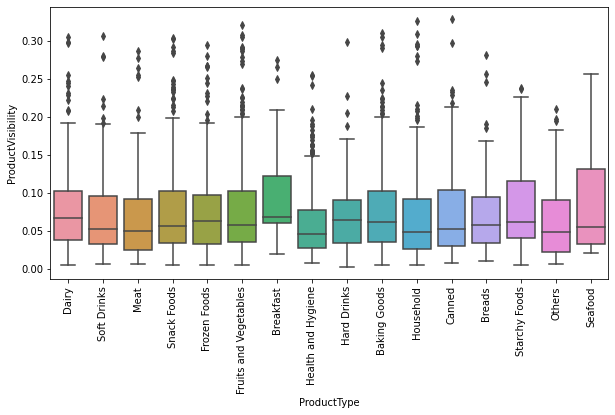

In [23]:
plt.figure(figsize=(10, 5))
fig = sns.boxplot(x="ProductType", y="ProductVisibility",
                  data=eda_data)
fig.tick_params(axis='x', rotation=90)


These box plot shows that there are some outliers, it can be
also seen that they have visibility more than 20%. This
also can be concluded from the histogram of visibility.
To make a more accurate data analysis, let's remove these
outliers too.

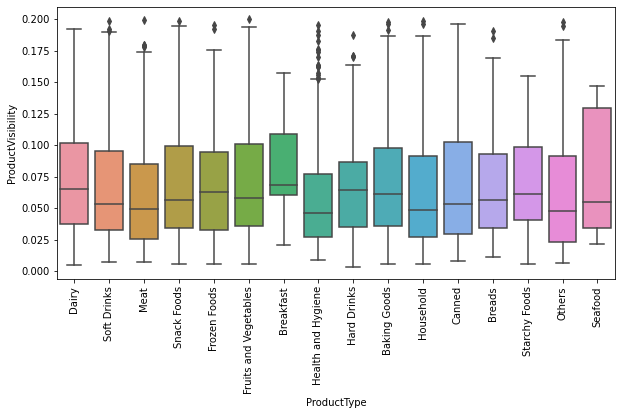

In [24]:
plt.figure(figsize=(10, 5))
data = data.loc[data['ProductVisibility'] <= 0.2, :]
eda_data = data.copy()
fig = sns.boxplot(x="ProductType", y="ProductVisibility",
                  data=eda_data)
fig.tick_params(axis='x', rotation=90)

The average product visibility of different product types seems quite close. Products in the "breakfast" type are more visible on average.
Seafood products also seem to have a wider range of visibility
in terms of quantiles, which indicates that the presentation of
that type of food can change most compared to other categories
store to store.

_Product type and total sales_

Now, let's bring the total sales into the table.

<AxesSubplot:xlabel='OutletID', ylabel='Total Sales'>

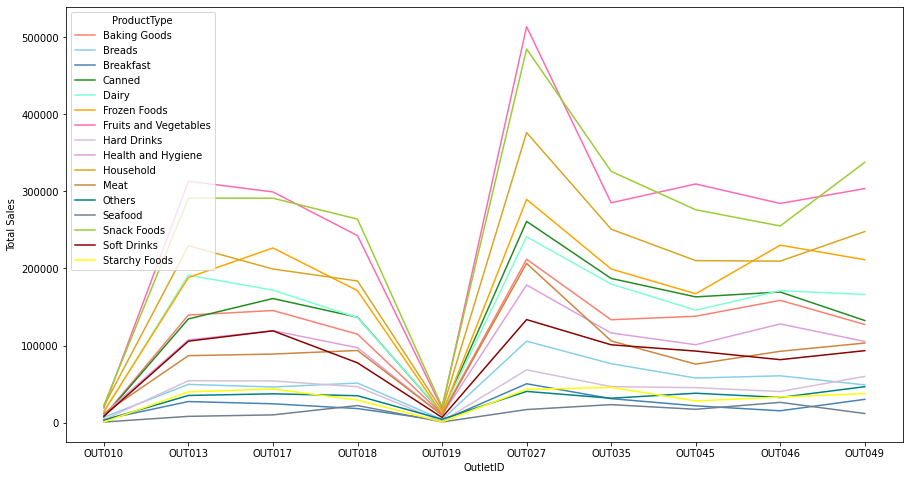

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xticks(np.arange(10))
ax.set_ylabel("Total Sales")# to see all outlet ticks
from cycler import cycler  # to use different color for each category

custom_cycler = (cycler(color=['salmon', 'skyblue', 'steelblue', 'forestgreen', 'aquamarine', 'orange',
                               'hotpink', 'thistle', 'plum', 'goldenrod', 'peru', 'teal', 'slategray',
                               'yellowgreen', 'darkred', 'yellow']))
ax.set_prop_cycle(custom_cycler)
# total sales grouped by outlets and product types
eda_data.groupby(['OutletID', 'ProductType']).sum()['OutletSales'].unstack().plot(ax=ax, kind='line')

As seen from this plot, fruits and vegetables, and snack food are the product types that bring most of the income
in the stores in general.
On the other hand, seafood and breakfast are the food types that
bring the least income. It is interesting that the breakfast type is
the category that has the highest visibility on average, but it contributes a
much smaller portion in sales in terms of money.

_Stores (Outlets)_

From the last plot, it can be notified that OUT010 and OUT019 stores have the least
sales income compared to the other stores, while OUT027 has significantly larger total sales.
Let's look at the categorical features of these stores.

In [26]:
store_df = data.loc[:, ['OutletID', 'EstablishmentYear',
                        'OutletSize', 'LocationType', 'OutletType']]
# store specific columns, assumed to have the same value for a unique store
store = ps.sqldf("select * "
                 "from (select distinct * from store_df)"
                 "order by OutletID asc")
store.head(10)

,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,OUT010,1998,Medium,Tier 3,Grocery Store
1,OUT013,1987,High,Tier 3,Supermarket Type1
2,OUT017,2007,Medium,Tier 2,Supermarket Type1
3,OUT018,2009,Medium,Tier 3,Supermarket Type2
4,OUT019,1985,Small,Tier 1,Grocery Store
5,OUT027,1985,Medium,Tier 3,Supermarket Type3
6,OUT035,2004,Small,Tier 2,Supermarket Type1
7,OUT045,2002,Medium,Tier 2,Supermarket Type1
8,OUT046,1997,Small,Tier 1,Supermarket Type1
9,OUT049,1999,Medium,Tier 1,Supermarket Type1


Even if their sizes differ, OUT010 and OUT019 are grocery stores, while
OUT027 is a supermarket which is the only supermarket among the outlets
that is type 3.

<AxesSubplot:xlabel='OutletID', ylabel='Total Sales'>

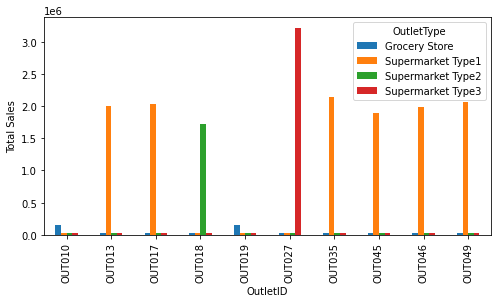

In [27]:
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.set_ylabel('Total Sales')
id_type = eda_data.groupby(['OutletID', 'OutletType']).sum()['OutletSales'].unstack()
id_type = id_type.replace(np.nan, 20000)  # just to showcase the type in the barchart
id_type.plot(kind='bar', ax=ax2)

As this barchart illustrates, grocery stores have much smaller income
compared to the supermarkets. An average (Supermarket) Type 1
store can make around 2 million (monetary unit) sale according to this data.
There is not enough information about Type 2 or Type 3, however,
it can be expected that Type 2 stores may make less sales
compared to Type 1 stores, while Type 3 stores may generate more.

_MRP and product type_

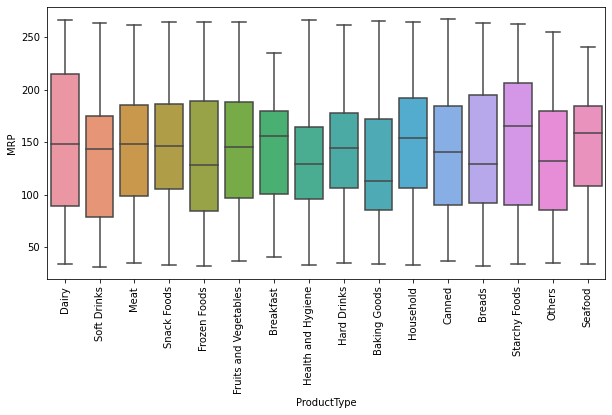

In [28]:
plt.figure(figsize=(10, 5))
fig = sns.boxplot(x="ProductType", y="MRP",
                  data=eda_data)
fig.tick_params(axis='x', rotation=90)

MRP seems to showcase wide ranges within the product groups.
Rather than MRP, number of sales made according to MRP
of a specific product in a specific store
can be analyzed.

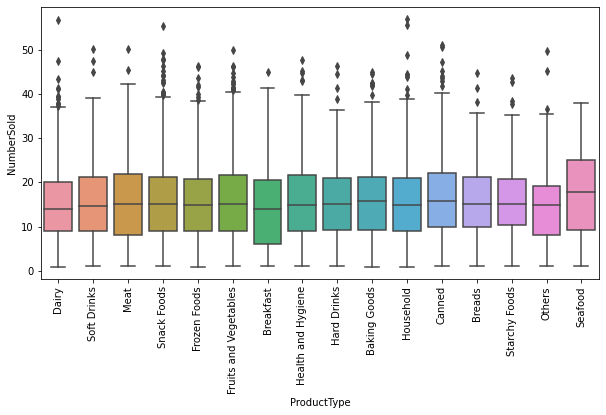

In [29]:
eda_data['NumberSold'] = eda_data.OutletSales / eda_data.MRP
plt.figure(figsize=(10, 5))
fig = sns.boxplot(x="ProductType", y="NumberSold",
                  data=eda_data)
fig.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='OutletID', ylabel='Number Sold'>

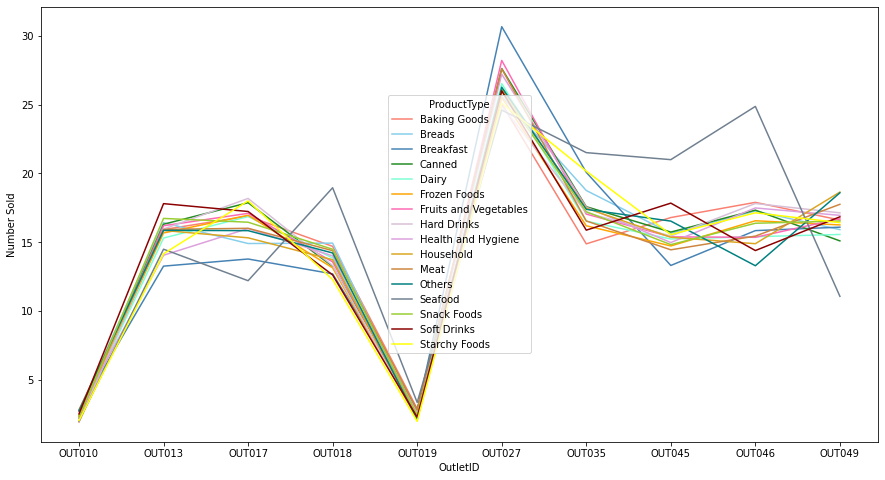

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xticks(np.arange(10))  # to see all outlet ticks
ax.set_ylabel('Number Sold')
ax.set_prop_cycle(custom_cycler)
# average number sold grouped by outlets and product types
eda_data.groupby(['OutletID', 'ProductType']).mean()['NumberSold'].unstack().plot(ax=ax, kind='line')

The average number of products sold from different categories
are quite close to each other. This makes it hard to analyze the
sales in terms of product type, because the average MRP (listed
retail price) is also similar among all product types. In real life,
do meat products and snack foods have similar listed prices?

Lastly, let's see the pair-plots of the data.


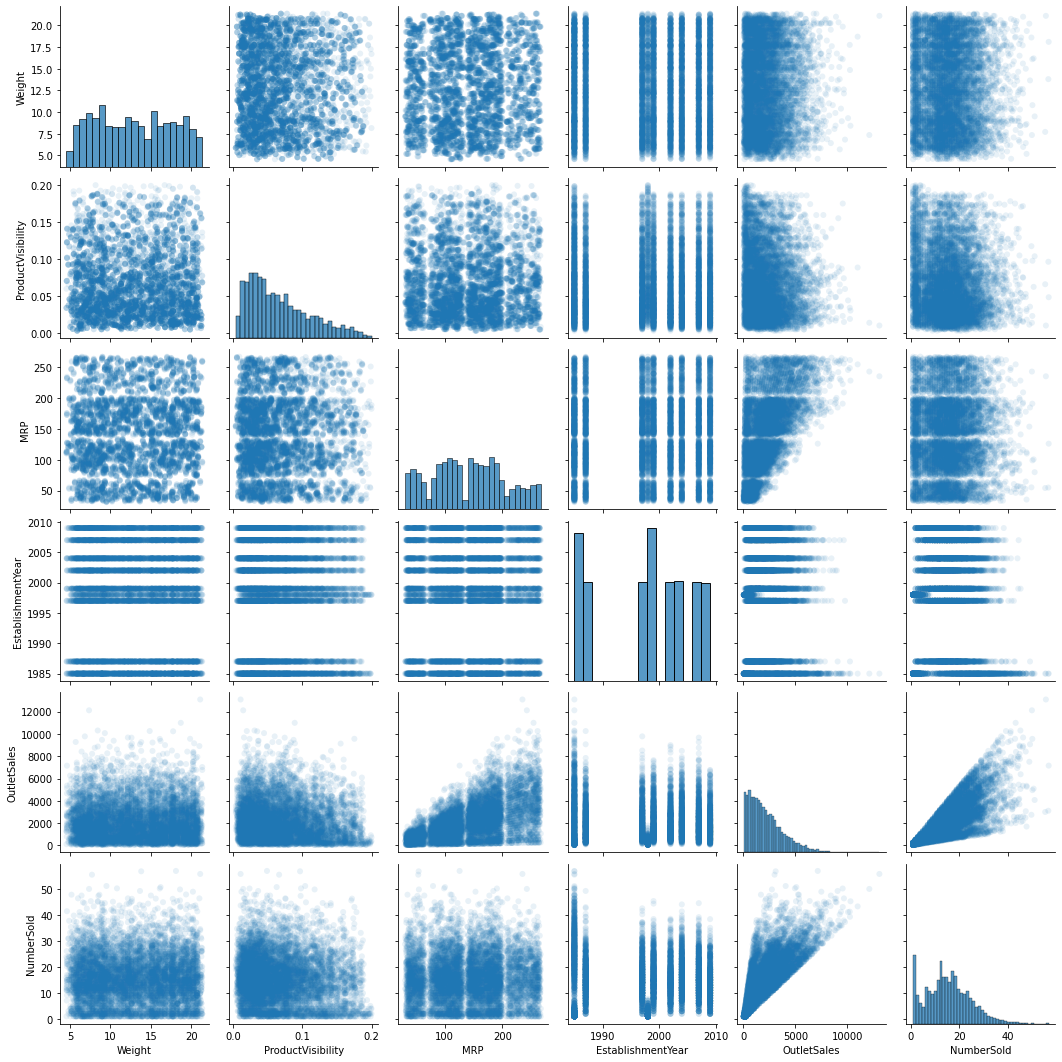

In [31]:
sns.pairplot(eda_data, plot_kws=dict(alpha=.1, edgecolor='none'))

For the numerical values, it is really hard to spot a meaningful relationship
between the total sales and the other features. However, the linear correlation
between the sales and MRP can be spotted.

### 4. Feature engineering

_Categorical features_

In [32]:
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
data[one_hot_encode_cols].columns

Index(['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize',
       'LocationType', 'OutletType'],
      dtype='object')

There are several categorical columns in the data, which means dummy columns are needed.
Other than ID columns, let's start analyzing "Fat Content" first.


In [33]:
data['FatContent'].value_counts()

Low Fat    4723
Regular    2648
LF          276
reg         113
low fat      99
Name: FatContent, dtype: int64

It looks like data has several names for the same category.
For example, it can be assumed that "Low Fat", "low fat" and "LF" strings boil down the same thing.
Same applies for "Regular" and "reg". Let's deal with this issue first.

In [34]:
# extract the ID columns, since they are unique for products and stores
one_hot_encode_cols.remove('OutletID')
one_hot_encode_cols.remove('ProductID')

for index, row in data.iterrows():
    if data.at[index, 'FatContent'] == "low fat" or data.at[index, 'FatContent'] == "LF":
        data.at[index, 'FatContent'] = "Low Fat"
    elif data.at[index, 'FatContent'] == "reg":
        data.at[index, 'FatContent'] = "Regular"

In [35]:
for col in one_hot_encode_cols:
    print("---" + col)
    print(data[col].value_counts())

---FatContent
Low Fat    5098
Regular    2761
Name: FatContent, dtype: int64
---ProductType
Fruits and Vegetables    1122
Snack Foods              1113
Household                 848
Frozen Foods              793
Dairy                     631
Canned                    606
Baking Goods              587
Health and Hygiene        483
Soft Drinks               406
Meat                      399
Breads                    231
Hard Drinks               194
Others                    158
Starchy Foods             128
Breakfast                 103
Seafood                    57
Name: ProductType, dtype: int64
---OutletSize
Medium    4816
Small     2170
High       873
Name: OutletSize, dtype: int64
---LocationType
Tier 3    3072
Tier 2    2616
Tier 1    2171
Name: LocationType, dtype: int64
---OutletType
Supermarket Type1    5235
Grocery Store         889
Supermarket Type3     872
Supermarket Type2     863
Name: OutletType, dtype: int64


The other categorical columns looks accurate in terms of categories.
Let's create the dummies for them.

In [36]:
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,7859.0,12.917351,4.646593,4.555000,8.865000,12.650000,17.000000,21.350000
ProductVisibility,7859.0,0.067431,0.044764,0.003575,0.031114,0.056657,0.095731,0.199955
MRP,7859.0,141.200225,62.211399,31.290000,94.126500,143.215400,185.775300,266.888400
EstablishmentYear,7859.0,1997.948848,8.342041,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
OutletSales,7859.0,2209.865345,1701.233675,33.290000,871.532200,1830.950000,3117.941400,13086.964800
FatContent_Regular,7859.0,0.351317,0.477412,0.000000,0.000000,0.000000,1.000000,1.000000
ProductType_Breads,7859.0,0.029393,0.168916,0.000000,0.000000,0.000000,0.000000,1.000000
ProductType_Breakfast,7859.0,0.013106,0.113736,0.000000,0.000000,0.000000,0.000000,1.000000
ProductType_Canned,7859.0,0.077109,0.266781,0.000000,0.000000,0.000000,0.000000,1.000000
ProductType_Dairy,7859.0,0.080290,0.271759,0.000000,0.000000,0.000000,0.000000,1.000000


Categorical features are ready. Let's analyze the numerical features now.

_Numerical features_

Numerical columns need to be checked for skew.

In [37]:
float_cols = data.columns[data.dtypes == float]
skew_limit = 0.75  # define a limit above to log transform
skew_vals = data[float_cols].skew()

In [38]:
# the skew columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
OutletSales,1.167149
ProductVisibility,0.786193


Since the column OutletSales is the target variable, let's transform
product visibility.

<AxesSubplot:>

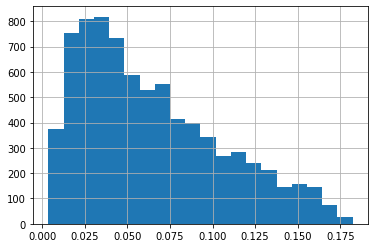

In [39]:
# applying a log transformation
data["ProductVisibility"].apply(np.log1p).hist(bins=20)


### 5. Hypotheses and testing

Here are 3 hypotheses formulated:

**1.** The visibility of dairy products are between 5% and 10%.

**2.** The average product visibility is 10%.

**3.** Hard drinks and soft drinks have similar product weights.

Let's apply a significance test on the third hypothesis.

$H_{0}$=Hard drinks and soft drinks have similar product weights
(category means are equal).

Now that two categories involved, f-test (ANOVA) will be used.


In [40]:

drinks = eda_data.loc[:, ['ProductID', 'Weight', 'ProductType']]
# product specific columns, assumed to have the same value for a unique product

drinks_all = ps.sqldf("select * "
                      "from (select distinct * from drinks)"
                      "where ProductType='Hard Drinks' or ProductType='Soft Drinks'")

F, p = sp.stats.f_oneway(drinks_all['Weight'][drinks_all['ProductType'] == 'Hard Drinks'],
                         drinks_all['Weight'][drinks_all['ProductType'] == 'Soft Drinks'])

print("p-value for significance is: ", p)
if p < 0.05: # 95% confidence
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

p-value for significance is:  0.8349431948208903
Accept null hypothesis.


Since the p-value is not less than alpha, the null hypothesis is accepted.

### 6. Suggestions and conclusion

For next steps of the analysis of this data, sampling can be used.
When the data is analyzed as a whole, most of the features failed to present
useful and unique information about the data. As is discussed in Section 3,
there are some statistics that are definitely not meaningful. For example,
one cannot expect to sell a similar number of products from very different
product types such as dairy and seafood. There are also some features present
in the data which does not help the analysis at all. For example, data has
10 different stores only, which makes it harder to analyze the store-
specific features. As another example, there is a category about fat content,
when there are product types such as household and hygiene. This categorization
can be misleading for future models.


In conclusion, the data can be extended in terms of outlets and also products.
The quality of the data seems to be disputable since there are common-sense
missing properties in the data which needs to be worked on (see MRP and product type).


_by Sude Kocaçiftçi Bayraktar_